### Practical 10

### Performing Logistic Regression on 'User_Data' dataset

###### Problem Statement: To make the logisrtric Regression model, predicting whether a user will purchase the product or not.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# This dataset contains information of users from a companies database.
# It contains information about UserID, Gender, Age EstimatedSalary, Purchased.
#We are using this dataset for predicting that a user will purchase the company's newly 
#launched product or not

dataset = pd.read_csv("D:/ML Dataset/User_Data.csv")
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
# Now, to predict whether a user willl purchase the product or not, one needs to find out
# the relatioinship between age and estimated salary.
#Here we assume that user id and gender are not important factors for finding out this

#input
x = dataset.iloc[:,[2,3]].values

#output
y = dataset.iloc[:, 4].values

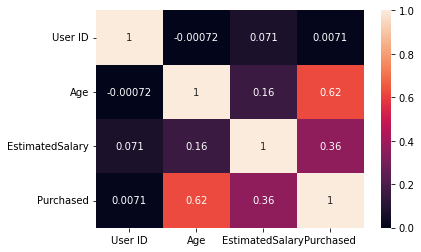

In [11]:
import seaborn as sns
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [39]:
#Splitting the dataset to train and test.
# 75% of data is used for training the model and 25% of it is used to test the performance of our mode.

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=0)

In [18]:
#Now, it is very important to perform feature scaling here because age and estimated salary value lie in different ranges.
# If we don't scale the features then Estimated Salary feature will dominate Age Feature
# When the model finds the nearest neighbor to a data point in data space.

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print(xtrain[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [19]:
# Here once see that Age and Estimated Salary featues values are sacled and now there in the -3 to 3
# Hence, each feature will contribute equally in decision making i.e. finalizing the hypothesis
# Next we are training our Logistic Regression model

from sklearn.linear_model import LogisticRegression

# random_state as parameter with seed value = 0, so that every time it generates same results.

classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [20]:
# After training the model , it time to use it to do prediction on testing data.

y_pred = classifier.predict(xtest)

In [21]:
# Let's test the performance of our model - Confusion Matrix

# We can find the accuracy of the predicted result by interpreting the confusion matrix.
# By output, we can interpret that 65+24 =89 (Correct Output) and 8+3 = 11 (Incorrect Output).

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)

print("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[65  3]
 [ 8 24]]


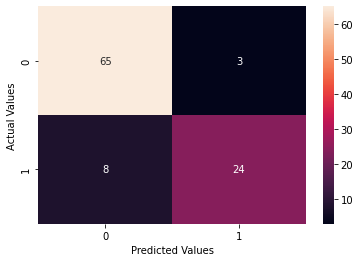

In [24]:
# Visualizing Confusioin Matrix using Heatmap

sns.heatmap(cm, annot=True)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [28]:
import sklearn.metrics as metrics

print("Accuracy:", metrics.accuracy_score(ytest,y_pred)*100, "%")
print("Precision:", metrics.precision_score(ytest, y_pred)*100, "%")
print("Recall:", metrics.recall_score(ytest, y_pred)*100, "%")


Accuracy: 89.0 %
Precision: 88.88888888888889 %
Recall: 75.0 %


In [31]:
true_pos = cm[1,1]
print('True Positive : ', true_pos)

true_neg = cm[0,0]
print('True Negative : ', true_neg)

false_pos = cm[0,1]
print('False Positive : ', false_pos)

false_neg = cm[1,0]
print('False Negative : ', false_neg)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity : ", sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print("Specificity : ", specificity)

True Positive :  24
True Negative :  65
False Positive :  3
False Negative :  8
Sensitivity :  0.9558823529411765
Specificity :  0.75


In [33]:
from sklearn.metrics import classification_report

print(print(classification_report(ytest, y_pred)))

# The reported averages include macro average (averaging the unweighted mean per label),
# weighted average (averaging the support-weighted mean per label).
# The support is the number of occurrences of each class in y_true i.e. ytest in this case.

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

None


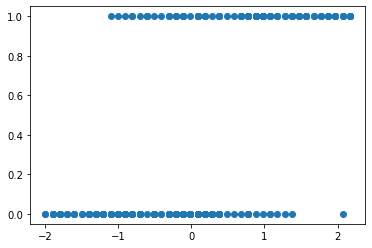

In [34]:
plt.scatter(xtrain[:,0],ytrain) # plot for first column which is age column

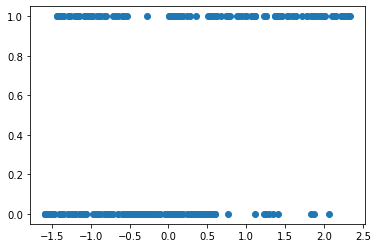

In [36]:
plt.scatter(xtrain[:, 1], ytrain) # plot for second column which is salary column

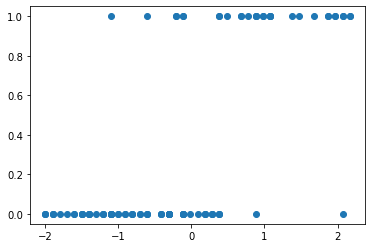

In [38]:
plt.scatter(xtest[:,0],ytest)